<a href="https://colab.research.google.com/github/piaosan78/AIFFEL_Quest/blob/master/Quest10/%EB%94%A5CV_10_2_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [42]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [43]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation


In [44]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
print(train_cats_dir)

# directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_dogs_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [45]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [46]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=False)

In [47]:
# 문제 1-2. hyperparameter 설정
batch_size = 32
epochs = 10
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [48]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [49]:
train_data_gen[0][0].shape

(32, 256, 256, 3)

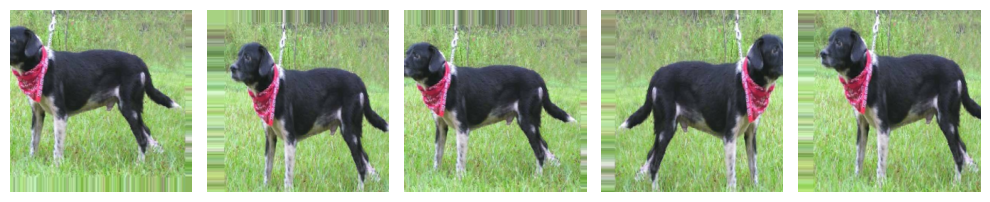

In [50]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [51]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [52]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


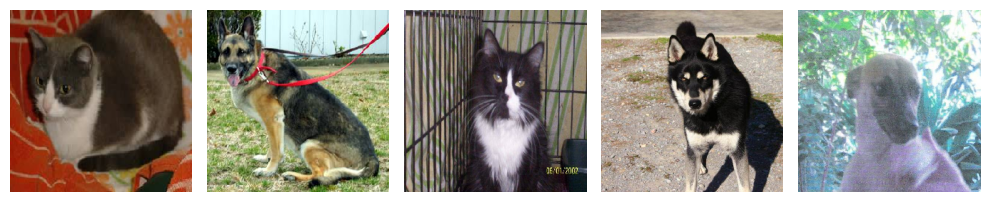

In [53]:
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [54]:
# 문제 1-2. 데이터 generator 생성
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.1,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=False)

In [55]:
# 수정된 VGG16 모델 생성 코드
input_layer = tf.keras.layers.Input(shape=(256, 256, 3))

# 첫 번째 Conv 블록
x = tf.keras.layers.Conv2D(64, (3,3), strides=1, activation="relu", padding="same")(input_layer)
x = tf.keras.layers.Conv2D(64, (3,3), strides=1, activation="relu", padding="same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2,2))(x)

# 두 번째 Conv 블록
x = tf.keras.layers.Conv2D(128, (3,3), strides=1, activation="relu", padding="same")(x)
x = tf.keras.layers.Conv2D(128, (3,3), strides=1, activation="relu", padding="same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2,2))(x)

# 세 번째 Conv 블록
x = tf.keras.layers.Conv2D(256, (3,3), strides=1, activation="relu", padding="same")(x)
x = tf.keras.layers.Conv2D(256, (3,3), strides=1, activation="relu", padding="same")(x)
x = tf.keras.layers.Conv2D(256, (3,3), strides=1, activation="relu", padding="same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2,2))(x)

# 네 번째 Conv 블록
x = tf.keras.layers.Conv2D(512, (3,3), strides=1, activation="relu", padding="same")(x)
x = tf.keras.layers.Conv2D(512, (3,3), strides=1, activation="relu", padding="same")(x)
x = tf.keras.layers.Conv2D(512, (3,3), strides=1, activation="relu", padding="same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2,2))(x)

# 다섯 번째 Conv 블록 (MaxPooling 제거)
x = tf.keras.layers.Conv2D(512, (3,3), strides=1, activation="relu", padding="same")(x)
x = tf.keras.layers.Conv2D(512, (3,3), strides=1, activation="relu", padding="same")(x)
x = tf.keras.layers.Conv2D(512, (3,3), strides=1, activation="relu", padding="same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2,2))(x)

# Dense 레이어들
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
out_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# 모델 생성
model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_26 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 256, 256, 64)      36928     
                                                                 
 batch_normalization_10 (Bat  (None, 256, 256, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 128, 128, 128)     7385

In [56]:
# 문제 1-2. loss function, optimizer, metric 설정 및 모델 컴파일
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.

In [57]:
# 모델 학습
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/10
62/62 [==============================] - 48s 601ms/step - loss: 34.0334 - binary_accuracy: 0.5065 - val_loss: 0.7432 - val_binary_accuracy: 0.5080
Epoch 2/10
62/62 [==============================] - 38s 604ms/step - loss: 0.6954 - binary_accuracy: 0.4975 - val_loss: 0.6903 - val_binary_accuracy: 0.5060
Epoch 3/10
62/62 [==============================] - 37s 596ms/step - loss: 0.6931 - binary_accuracy: 0.5010 - val_loss: 0.6934 - val_binary_accuracy: 0.5010
Epoch 4/10
62/62 [==============================] - 37s 593ms/step - loss: 0.6936 - binary_accuracy: 0.5020 - val_loss: 0.6925 - val_binary_accuracy: 0.5080
Epoch 5/10
62/62 [==============================] - 37s 589ms/step - loss: 0.6924 - binary_accuracy: 0.5005 - val_loss: 0.6921 - val_binary_accuracy: 0.5110
Epoch 6/10
62/62 [==============================] - 37s 592ms/step - loss: 0.6888 - binary_accuracy: 0.5395 - val_loss: 0.6930 - val_binary_accuracy: 0.5130
Epoch 7/10
62/62 [==============================] - 37s 5

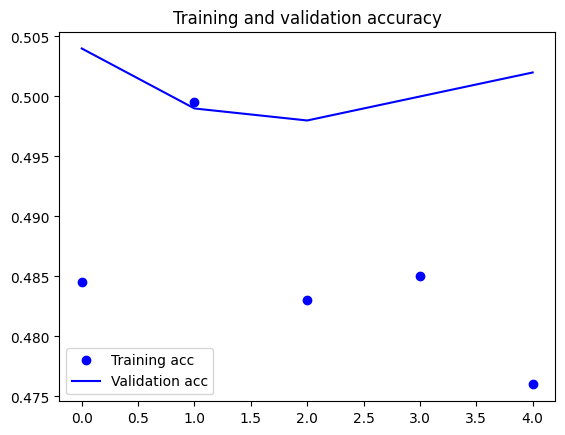

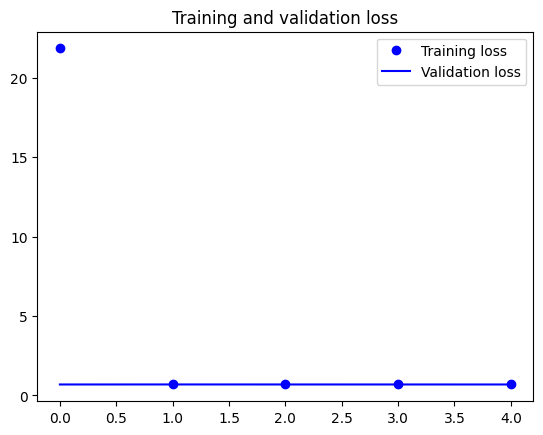

In [19]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()